<a href="https://colab.research.google.com/github/blmendes/My-Basketball-Shots-AI/blob/main/my_shots_notebook_explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI basketball analysis
<img class="emoji" alt="basketabll" height="300" width="700" src="https://raw.githubusercontent.com/hardik0/AI-basketball-analysis-on-google-colab/master/static/img/analysis.gif">

<img class="emoji" alt="basketabll" height="20" width="20" src="https://github.githubassets.com/images/icons/emoji/unicode/1f3c0.png"> **Analyze basketball shots and shooting pose with machine learning!**

This is an artificial intelligence application built on the concept of object detection. Analyze basketball shots by digging into the data collected from object detection. We can get the result by simply uploading files to the web App, or submitting a POST request to the API.

**Credits:**

Special thanks to:

**Tony Chou** for this amazing github repo **[AI-basketball-analysis](https://github.com/chonyy/AI-basketball-analysis)**

**CMU Perceptual Computing Lab** for **[OpenPose](https://github.com/CMU-Perceptual-Computing-Lab/openpose)**

# requirements 

In [3]:
!pip install youtube-dl
!pip install -q qrcode

In [ ]:
# First, change the runtime type to "GPU".
! nvcc --version
! nvidia-smi # Confirm runtime to GPU
''' Openpose version tag '''
! cmake --version

'''CMake can generate a native build environment that will compile source code, create libraries, 
   generate wrappers and build executables in arbitrary combinations.'''
! wget -c "https://github.com/Kitware/CMake/releases/download/v3.21.1/cmake-3.21.1.tar.gz"
! tar xf cmake-3.21.1.tar.gz
! cd cmake-3.21.1 && ./configure && make && sudo make install

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0
Sat Aug 14 19:53:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.42.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |         

# OpenPose

Source:  [CMU-Perceptual-Computing-Lab/openpose](https://github.com/CMU-Perceptual-Computing-Lab/openpose.git) to detect/track multi person poses on a given youtube video.

## Install OpenPose


In [ ]:
# Install library

# Basic
! sudo apt-get --assume-yes update
! sudo apt-get --assume-yes install build-essential
# OpenCV
! sudo apt-get --assume-yes install libopencv-dev
# General dependencies
! sudo apt-get --assume-yes install libatlas-base-dev libprotobuf-dev libleveldb-dev libsnappy-dev libhdf5-serial-dev protobuf-compiler
! sudo apt-get --assume-yes install --no-install-recommends libboost-all-dev
! sudo apt-get --assume-yes install libgflags-dev libgoogle-glog-dev liblmdb-dev
# Python3 libs
! sudo apt-get --assume-yes install python3-setuptools python3-dev build-essential
! sudo apt-get --assume-yes install python3-pip
! sudo -H pip3 install --upgrade numpy protobuf opencv-python
# OpenCL Generic
! sudo apt-get --assume-yes install opencl-headers ocl-icd-opencl-dev
! sudo apt-get --assume-yes install libviennacl-dev

In [ ]:
# Clone Openpose
## https://github.com/CMU-Perceptual-Computing-Lab/openpose/blob/master/doc/installation.md#cmake-command-line-configuration-ubuntu-only

! git clone  --depth 1 -b "$ver_openpose" https://github.com/CMU-Perceptual-Computing-Lab/openpose.git
! git clone https://github.com/CMU-Perceptual-Computing-Lab/openpose.git
! cd openpose && mkdir build && cd build
! cd openpose/build && cmake -DBUILD_PYTHON=ON .. 
! cd openpose/build && cmake .. -D DOWNLOAD_BODY_COCO_MODEL=ON
! cd openpose/build && cmake .. -D DOWNLOAD_BODY_MPI_MODEL=ON

In [ ]:
# Openpose Building
! cd openpose/build && make -j`nproc`

In [ ]:
# Openpose Installing
! cd openpose/build && make install

In [ ]:
! echo "include /usr/local/lib" >> /etc/ld.so.conf
! ldconfig 
%ls /usr/local/python

# Run and check the sample
# The output analysis result is placed under "openpose/output" from the folder icon on the left menu of the Colab screen.
! cd openpose && mkdir output && ./build/examples/openpose/openpose.bin --video examples/media/video.avi --display 0  --write_video ./output/openpose.avi

## Detect poses on a test video

We are going to detect poses on the following youtube video:

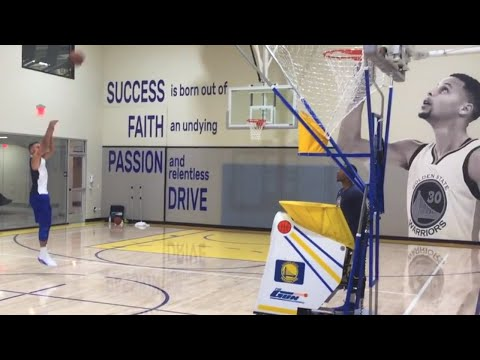

In [20]:
from IPython.display import YouTubeVideo

YOUTUBE_ID = 'aDpt1_W6xX0'

YouTubeVideo(YOUTUBE_ID)

Download the above youtube video, cut the first 5 seconds and do the pose detection on that 5 seconds:

In [ ]:
!rm -rf youtube.mp4
# download the youtube with the given ID
!youtube-dl -f 'bestvideo[ext=mp4]' --output "youtube.%(ext)s" https://www.youtube.com/watch?v=$YOUTUBE_ID
# cut the first 5 seconds
!ffmpeg -y -loglevel info -i youtube.mp4 -t 5 video.mp4
# detect poses on the these 5 seconds
!rm openpose.avi
!cd openpose && ./build/examples/openpose/openpose.bin --video ../video.mp4 --write_json ./output/ --display 0  --write_video ../openpose.avi
# convert the result into MP4
!ffmpeg -y -loglevel info -i openpose.avi output.mp4

Finally, visualize the result:

In [ ]:
def show_local_mp4_video(file_name, width=640, height=480):
  import io
  import base64
  from IPython.display import HTML
  video_encoded = base64.b64encode(io.open(file_name, 'rb').read())
  return HTML(data='''<video width="{0}" height="{1}" alt="test" controls>
                        <source src="data:video/mp4;base64,{2}" type="video/mp4" />
                      </video>'''.format(width, height, video_encoded.decode('ascii')))

show_local_mp4_video('youtube.mp4', width=960, height=720)

# <img class="emoji" alt="basketabll" height="20" width="20" src="https://github.githubassets.com/images/icons/emoji/unicode/1f3c0.png"> Analyze basketball shots and shooting pose with machine learning!

## Get a copy
Get a copy of this project by simply running the git clone command.

In [17]:
# Original repository
#! git clone https://github.com/chonyy/AI-basketball-analysis.git

# Modified version 
! git clone https://github.com/hardik0/AI-basketball-analysis-on-google-colab
%cd AI-basketball-analysis-on-google-colab

Cloning into 'AI-basketball-analysis-on-google-colab'...
remote: Enumerating objects: 854, done.
remote: Counting objects: 100% (228/228), done.
remote: Compressing objects: 100% (179/179), done.
remote: Total 854 (delta 108), reused 133 (delta 44), pack-reused 626
Receiving objects: 100% (854/854), 294.93 MiB | 34.53 MiB/s, done.
Resolving deltas: 100% (331/331), done.
Checking out files: 100% (99/99), done.
/content/AI-basketball-analysis-on-google-colab


## Prerequisites
Before running the project, we have to install all the dependencies from requirements.txt

In [18]:
! pip install -r colab_requirements.txt

     |████████████████████████████████| 91 kB 5.4 MB/s 
     |████████████████████████████████| 516.2 MB 1.9 kB/s 
     |████████████████████████████████| 14.6 MB 68 kB/s 
     |████████████████████████████████| 37.1 MB 43 kB/s 
     |████████████████████████████████| 77 kB 8.8 MB/s 
     |████████████████████████████████| 2.1 MB 57.5 MB/s 
     |████████████████████████████████| 3.0 MB 22.0 MB/s 
     |████████████████████████████████| 2.9 MB 57.0 MB/s 
     |████████████████████████████████| 454 kB 60.5 MB/s 
     |████████████████████████████████| 7.9 MB 15.7 MB/s 
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19494 sha256=88872eb425b6ea53282e4fed38c4fdd83f0040fad7aa384ce61fff3187fc2fe3
  Stored in directory: /root/.cache/pip/wheels/56/88/e6/897194cfe8c08a8b9afd881d3bf53d102e13fa39607d721383
Successfully built image
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling numpy-1.21.1:
      Successfully uninstalled nu

You must restart the runtime

In [19]:
%cd AI-basketball-analysis-on-google-colab

[Errno 2] No such file or directory: 'AI-basketball-analysis-on-google-colab'
/content/AI-basketball-analysis-on-google-colab


## Hosting

In [20]:
# Download ngrok for tunneling.
!if [ ! -f ./ngrok ]; then \
 wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip; \
 unzip -o ngrok-stable-linux-amd64.zip; \
 fi

--2021-08-13 20:35:45--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 44.195.251.4, 54.174.143.90, 35.153.244.194, ...
Connecting to bin.equinox.io (bin.equinox.io)|44.195.251.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  19.5MB/s    in 0.7s    

2021-08-13 20:35:46 (19.5 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [21]:
# Then start a mini web server.
port = 5000
!pkill ngrok
!kill $(ps x | grep -v grep | grep http.server | awk '{print $1}') 2>/dev/null

get_ipython().system_raw(
    'python app.py && python3 -m http.server {} &'
    .format(port)
)

# And, forward the port using ngrok.
get_ipython().system_raw('./ngrok http {} &'.format(port))

**Port forwarding**

Via a `ngrok` tunnel from the local machine to the internet.

In [22]:
# Get the public address from localhost:4040 (ngrok's web interface).
import time, urllib, json
time.sleep(1)  # Give ngrok time to startup.
ngrok_data = json.load(
    urllib.request.urlopen('http://localhost:4040/api/tunnels'))
ngrok_data['tunnels'][0]['public_url']

'https://4dd41b13eb26.ngrok.io'

     |████████████████████████████████| 43 kB 1.1 MB/s 


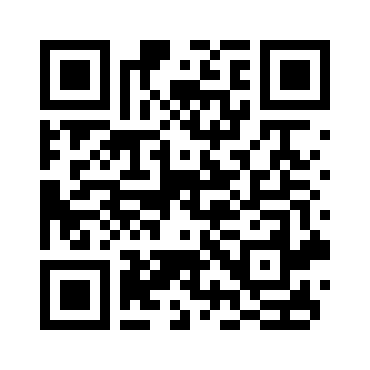

In [23]:
# You can connect to this external address using your mobile phone!

import qrcode
qrcode.make(ngrok_data['tunnels'][0]['public_url'])

Last, get the project hosted on google colab with a single command.

To restart Server/Flask you may click Menu: **Runtime->Restart runtime**

**Note:** After restart you can start with [here](#scrollTo=xz_TJD1MgEWR)

In [24]:
# First run this cell then open above link 
!python app.py

Traceback (most recent call last):
  File "app.py", line 10, in <module>
    from src.app_helper import getVideoStream, get_image, detectionAPI
  File "/content/AI-basketball-analysis-on-google-colab/src/app_helper.py", line 5, in <module>
    import tensorflow.compat.v1 as tf
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/__init__.py", line 41, in <module>
    from tensorflow.python.tools import module_util as _module_util
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/__init__.py", line 84, in <module>
    from tensorflow.python import keras
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/__init__.py", line 27, in <module>
    from tensorflow.python.keras import models
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/models.py", line 24, in <module>
    from tensorflow.python.keras import metrics as metrics_module
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/metrics.py", line 37, in <m

Or you can run below cell 

In [1]:
! pip install tensorflow==2.1.0

     |████████████████████████████████| 421.8 MB 25 kB/s 
     |████████████████████████████████| 3.8 MB 60.2 MB/s 
     |████████████████████████████████| 50 kB 9.1 MB/s 
     |████████████████████████████████| 448 kB 59.9 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=29ec33d6091715b72b4d97825cfbf8a48b8e29765a7baab7b7e0ff3334429a3b
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [25]:
import os
import sys
import cv2

from flask import Flask, render_template, Response,  request, session, redirect, url_for, send_from_directory, flash, jsonify, abort
from werkzeug.utils import secure_filename
from PIL import Image


from src.config import shooting_result
from src.app_helper import getVideoStream, get_image, detectionAPI

app = Flask(__name__)

UPLOAD_FOLDER = './static/uploads'
app.config['UPLOAD_FOLDER'] = UPLOAD_FOLDER
#useless key, in order to use session
app.secret_key = "super secret key" 

@app.route("/")
def index():
    return render_template("index.html")

@app.route('/detection_json', methods=['GET', 'POST'])
def detection_json():
    if request.method == 'POST':
        response = []
        f = request.files['image']
        # create a secure filename
        filename = secure_filename(f.filename)
        print("filename", filename)
        # save file to /static/uploads
        filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
        print("filepath", filepath)
        f.save(filepath)
        detectionAPI(response, filepath)
        print(response)
        try:
            return jsonify(response), 200
        except FileNotFoundError:
            abort(404)


@app.route('/sample_detection', methods=['GET', 'POST'])
def upload_sample_image():
    if request.method == 'POST':
        response = []
        filename = "sample_image.jpg"
        print("filename", filename)
        filepath = "./static/uploads/sample_image.jpg"
        print("filepath", filepath)
        get_image(filepath, filename, response)
        return render_template("shot_detection.html", display_detection=filename, fname=filename, response=response)

@app.route('/basketball_detection', methods=['GET', 'POST'])
def upload_image():
    if request.method == 'POST':
        response = []
        f = request.files['image']
        # create a secure filename
        filename = secure_filename(f.filename)
        print("filename", filename)
        # save file to /static/uploads
        filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
        print("filepath", filepath)
        f.save(filepath)
        get_image(filepath, filename, response)
        return render_template("shot_detection.html", display_detection=filename, fname=filename, response=response)

@app.route('/sample_analysis', methods=['GET', 'POST'])
def upload_video():
    global shooting_result
    shooting_result['attempts'] = 0
    shooting_result['made'] = 0
    shooting_result['miss'] = 0
    if (os.path.exists("./static/detections/trajectory_fitting.jpg")):
        os.remove("./static/detections/trajectory_fitting.jpg")
    if request.method == 'POST':
        filename = "sample_video.mp4"
        print("filename", filename)
        filepath = "./static/uploads/sample_video.mp4"
        print("filepath", filepath)
        session['video_path'] = filepath
        return render_template("shooting_analysis.html")

@app.route('/shooting_analysis', methods=['GET', 'POST'])
def upload_sample_video():
    global shooting_result
    shooting_result['attempts'] = 0
    shooting_result['made'] = 0
    shooting_result['miss'] = 0
    if (os.path.exists("./static/detections/trajectory_fitting.jpg")):
        os.remove("./static/detections/trajectory_fitting.jpg")
    if request.method == 'POST':
        f = request.files['video']
        # create a secure filename
        filename = secure_filename(f.filename)
        print("filename", filename)
        # save file to /static/uploads
        filepath = os.path.join(app.config['UPLOAD_FOLDER'], filename)
        print("filepath", filepath)
        f.save(filepath)
        session['video_path'] = filepath
        return render_template("shooting_analysis.html")

@app.route('/video_feed')
def video_feed():
    video_path = session.get('video_path', None)
    stream = getVideoStream(video_path)
    return Response(stream,
                    mimetype='multipart/x-mixed-replace; boundary=frame')

@app.route("/result", methods=['GET', 'POST'])
def result():
    return render_template("result.html", shooting_result=shooting_result)

#disable caching
@app.after_request
def after_request(response):
    response.headers["Cache-Control"] = "no-cache, no-store, must-revalidate, public, max-age=0"
    response.headers["Expires"] = 0
    response.headers["Pragma"] = "no-cache"
    return response

if __name__ == '__main__':
    app.run(debug=True, use_reloader=True)

AttributeError: ignored